In [1]:
import numpy as np
import pandas as pd
from rdkit import rdBase, Chem, DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import os
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import openpyxl
from shutil import copy

In [2]:
os.getcwd()

'F:\\Paper\\Code\\478 compounds'

In [3]:
data1 = pd.DataFrame(columns=())

In [4]:
filePath = os.getcwd()+'\\DataSet'
for i, j, mols in os.walk(filePath):
     for file in mols:
            data1 = data1.append(pd.DataFrame({ 'Name':[file],'MOL': [Chem.MolFromMolFile(os.path.join(filePath,file))],}),ignore_index=True)

     print(data1)

C:\Users\Mars\AppData\Local\Temp\ipykernel_14552\4181188670.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data1 = data1.append(pd.DataFrame({ 'Name':[file],'MOL': [Chem.MolFromMolFile(os.path.join(filePath,file))],}),ignore_index=True)


                Name                                                MOL
0    100343-63-3.mol  <rdkit.Chem.rdchem.Mol object at 0x0000018018C...
1    104060-61-9.mol  <rdkit.Chem.rdchem.Mol object at 0x0000018018F...
2    104777-67-5.mol  <rdkit.Chem.rdchem.Mol object at 0x0000018018E...
3    104901-10-2.mol  <rdkit.Chem.rdchem.Mol object at 0x0000018018F...
4    104926-77-4.mol  <rdkit.Chem.rdchem.Mol object at 0x0000018018F...
..               ...                                                ...
473  103451-12-3.mol  <rdkit.Chem.rdchem.Mol object at 0x0000018018F...
474    3621-38-3.mol  <rdkit.Chem.rdchem.Mol object at 0x0000018018F...
475         M-30.mol  <rdkit.Chem.rdchem.Mol object at 0x0000018018C...
476       No.167.mol  <rdkit.Chem.rdchem.Mol object at 0x0000018018F...
477    3621-36-1.mol  <rdkit.Chem.rdchem.Mol object at 0x0000018018F...

[478 rows x 2 columns]


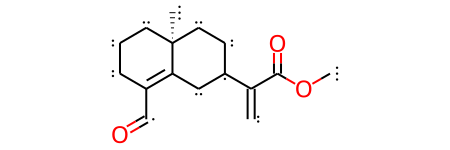

In [5]:
data1.values[0,1]

In [6]:
fingerprints = []
safe = []

for value in data1.values:
    name = value[0]
    mol = value[1]
    try:
        fingerprint = [x for x in Chem.MACCSkeys.GenMACCSKeys(mol)]
        fingerprints.append(fingerprint)
        safe.append(name)
    except:
        print("Error", name)
        continue
        
        
data = pd.DataFrame(fingerprints)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0


In [7]:
data.values[0,0:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [8]:
np.mean(data, axis=0)

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
162    0.592050
163    0.914226
164    0.987448
165    0.989540
166    0.002092
Length: 167, dtype: float64

In [9]:
np.std(data, axis=0)

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
162    0.491454
163    0.280030
164    0.111332
165    0.101739
166    0.045691
Length: 167, dtype: float64

In [10]:
#数据预处理：标准化处理
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = pd.DataFrame(data)

In [11]:
data

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.244677,-0.153475,0.375249,-1.457458,-0.173702,-1.204692,0.306303,0.112747,0.102815,-0.045787
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.244677,-0.153475,0.375249,-1.457458,-0.173702,0.830088,0.306303,0.112747,0.102815,-0.045787
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.244677,-0.153475,0.375249,-1.457458,-0.173702,-1.204692,0.306303,0.112747,0.102815,-0.045787
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.244677,-0.153475,0.375249,0.686126,-0.173702,0.830088,0.306303,0.112747,0.102815,-0.045787
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.244677,-0.153475,0.375249,-1.457458,-0.173702,0.830088,0.306303,0.112747,0.102815,-0.045787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.087016,6.515715,-2.664901,0.686126,5.756983,0.830088,0.306303,0.112747,0.102815,-0.045787
474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.244677,6.515715,0.375249,0.686126,5.756983,0.830088,0.306303,0.112747,0.102815,-0.045787
475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.244677,-0.153475,0.375249,0.686126,-0.173702,-1.204692,0.306303,0.112747,0.102815,-0.045787
476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.244677,-0.153475,0.375249,-1.457458,-0.173702,0.830088,0.306303,0.112747,0.102815,-0.045787


In [12]:
dataMat=data.dropna(axis=1, how='all') #删除全为NaN的列

In [13]:
dataMat.head()

,16,19,22,26,28,30,34,39,40,48,...,157,158,159,160,161,162,163,164,165,166
0,-0.298057,-0.57574,-0.298057,2.007879,-0.079472,-0.045787,-0.298057,-0.045787,-0.045787,-0.045787,...,0.244677,-0.153475,0.375249,-1.457458,-0.173702,-1.204692,0.306303,0.112747,0.102815,-0.045787
1,-0.298057,-0.57574,-0.298057,-0.498038,-0.079472,-0.045787,-0.298057,-0.045787,-0.045787,-0.045787,...,0.244677,-0.153475,0.375249,-1.457458,-0.173702,0.830088,0.306303,0.112747,0.102815,-0.045787
2,-0.298057,-0.57574,-0.298057,2.007879,-0.079472,-0.045787,-0.298057,-0.045787,-0.045787,-0.045787,...,0.244677,-0.153475,0.375249,-1.457458,-0.173702,-1.204692,0.306303,0.112747,0.102815,-0.045787
3,-0.298057,-0.57574,-0.298057,-0.498038,-0.079472,-0.045787,-0.298057,-0.045787,-0.045787,-0.045787,...,0.244677,-0.153475,0.375249,0.686126,-0.173702,0.830088,0.306303,0.112747,0.102815,-0.045787
4,-0.298057,-0.57574,-0.298057,-0.498038,-0.079472,-0.045787,-0.298057,-0.045787,-0.045787,-0.045787,...,0.244677,-0.153475,0.375249,-1.457458,-0.173702,0.830088,0.306303,0.112747,0.102815,-0.045787


In [14]:
km = KMeans(n_clusters=11, # 簇的个数K
           init='k-means++', 
           n_init=40,# 执行40次独立的K-均值聚类算法
           max_iter=300, # 每次运行的最大迭代数
           tol=1e-04, # 控制簇内SSE的变化以定义收敛标准
           random_state=0)
y_km = km.fit_predict(dataMat)
print(y_km)

[ 1  0  1  0  0  1  1  6  2 10  2  0  2  2  7  0  0  0  0  2  0  0 10  1
  0  1  1  0  0  1  1  0  0  0  0  0 10  2  0  0  0  2  0  2 10  1 10  1
  1  0  0  0  0  0  0  0  0  0  0  2  2  1  1  1  1  0  6  6  5 10 10 10
 10  2  0  1  2  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 10  1  1  1  1  1 10  1  1  1  1  1  1  1  1  1  1  0
  0  0  0  1  5  1  1  1  0 10 10  1  5  1  1 10 10 10 10  1  0  0  0  0
  1  1  1  1 10  1 10  0  0  0 10  5 10  3  1  1  1 10  1  1  1  1  1  1
  1  0  6  0  0  0  0  0  6  0  0  0  0  6  6  0  0  0 10  4  5 10 10  1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5 10 10
  2 10  2 10  0  1  2  2  2  2  5  5  5  5  5 10 10 10  0  0  6  1  1  1
  1  1  1  0  1  0  2  0  6  6  6  0  0  0  0  0  0  0  0  0  6  0  0  0
  0  7  0  0  0  0  0  0  0  5  5 10  5  5 10  5 10  5  0  0  0  0  0  8
  0  0 10  8  9  0  1 10  0  0  0  0  0  0  0  0  2  1  4  4  7 10  1  1
  7  4  0  1  1  1  1 10  0  8  0  6  0  0  0  5  1

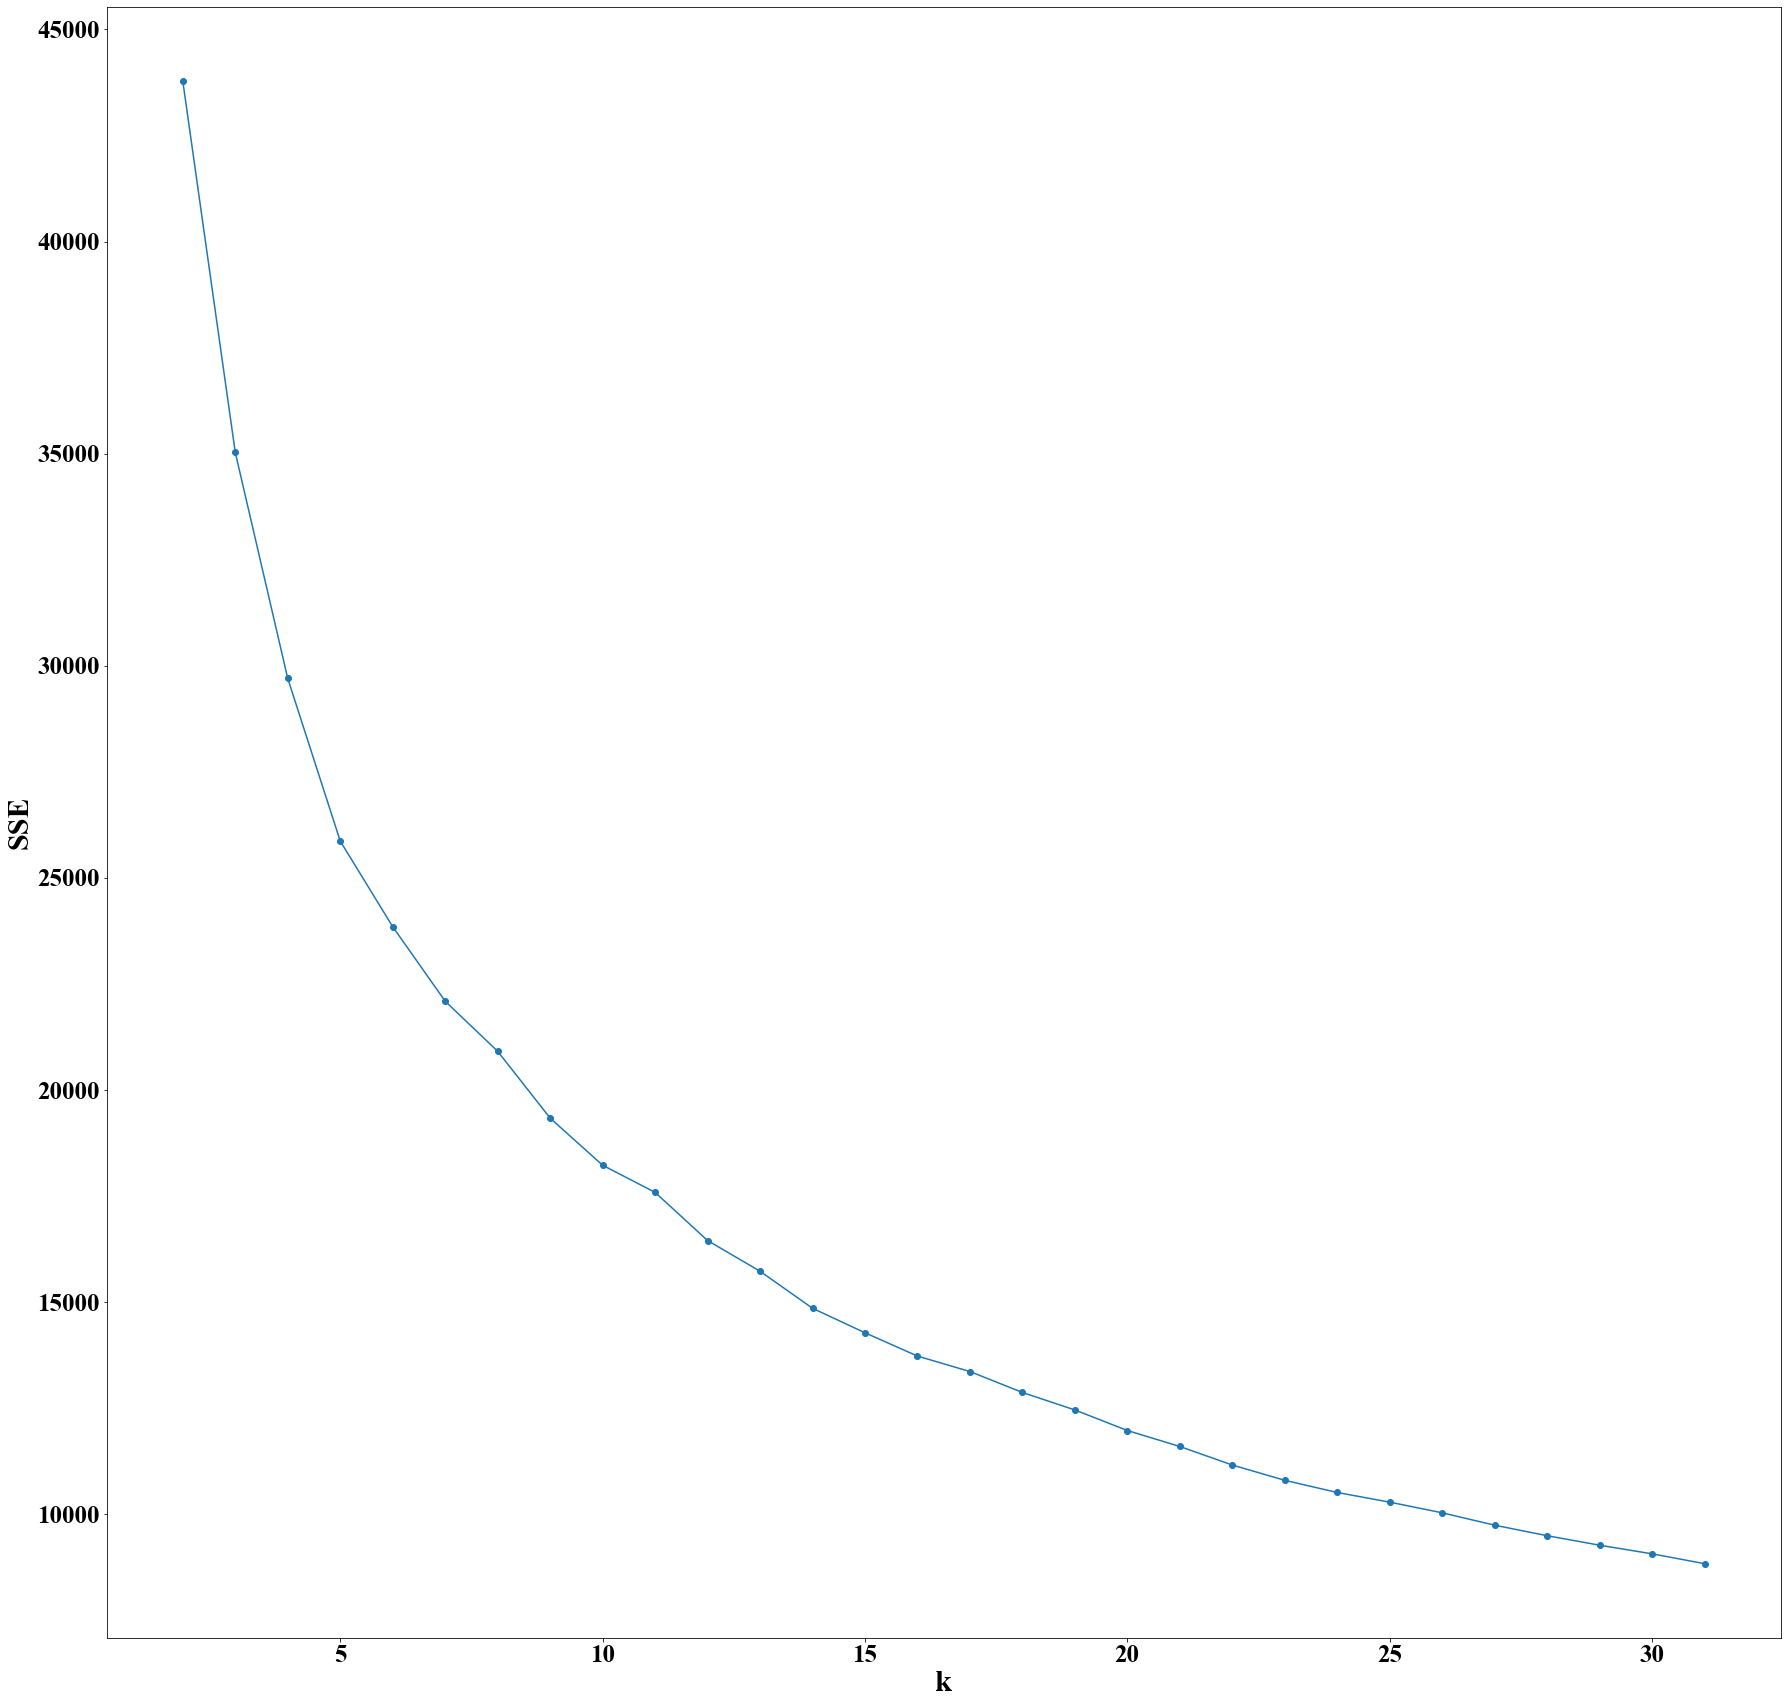

In [15]:
sil_score = [] # 存放每次结果的轮廓系数
SSE = []  # 存放每次结果的误差平方和
for k in range(2,32):
    estimator = KMeans(n_clusters=k,
                       init='k-means++',
                       n_init=40,
                       max_iter=300,
                       tol=1e-04,
                       random_state=0)  # 构造聚类器
    predict_y = estimator.fit_predict(dataMat)
    SSE.append(estimator.inertia_)
    sil_score.append(silhouette_score(dataMat, predict_y))
X = range(2,32)
plt.figure(figsize=(30,30))
plt.xlabel('k', fontproperties='Times New Roman', size=30, weight='bold')
plt.ylabel('SSE', fontproperties='Times New Roman', size=30, weight='bold')
plt.plot(X, SSE, 'o-')
plt.yticks(fontproperties='Times New Roman', size=25, weight='bold')
plt.xticks(fontproperties='Times New Roman', size=25, weight='bold')
plt.savefig('肘部法则.jpg', dpi=200, bbox_inches='tight')
plt.show()

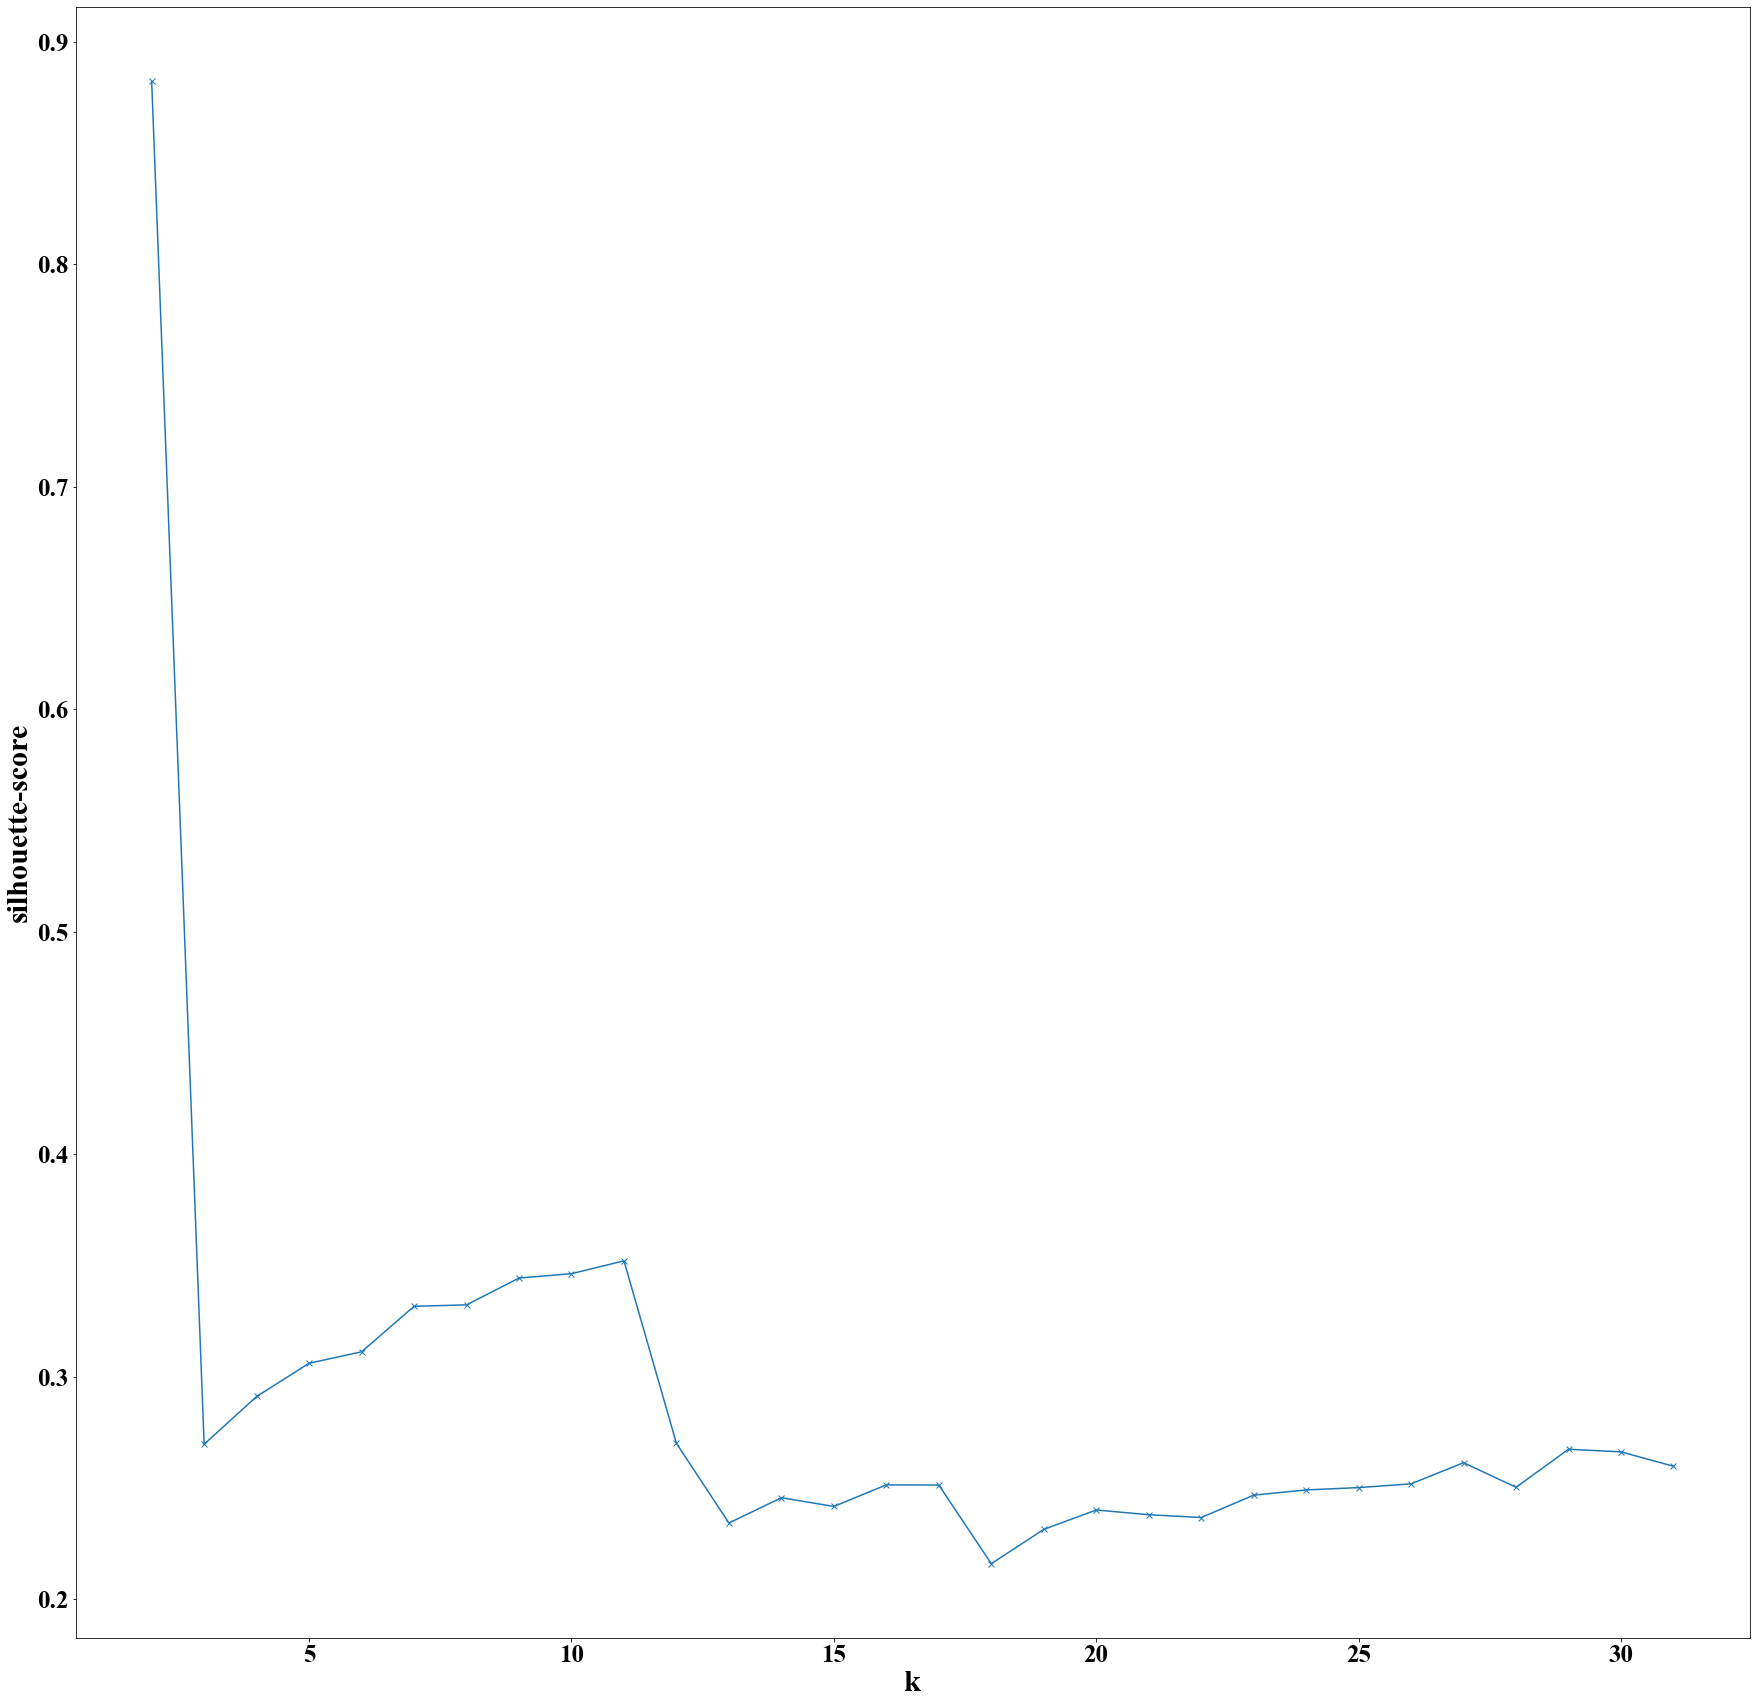

In [16]:
plt.figure(figsize=(30,30))
plt.xlabel('k', fontproperties='Times New Roman', size=30, weight='bold')
plt.ylabel('silhouette-score', fontproperties='Times New Roman', size=30, weight='bold')
plt.plot(X, sil_score, 'x-')
plt.yticks(fontproperties='Times New Roman', size=25, weight='bold')
plt.xticks(fontproperties='Times New Roman', size=25, weight='bold')
plt.savefig('轮廓系数.jpg', dpi=200, bbox_inches='tight')
plt.show()

In [45]:
sil_score[9],SSE[9]

(0.35213508027785395, 17582.180480396244)

In [17]:
label=list(enumerate(y_km)) # 各个化合物对应的聚类

In [18]:
label

[(0, 1),
 (1, 0),
 (2, 1),
 (3, 0),
 (4, 0),
 (5, 1),
 (6, 1),
 (7, 6),
 (8, 2),
 (9, 10),
 (10, 2),
 (11, 0),
 (12, 2),
 (13, 2),
 (14, 7),
 (15, 0),
 (16, 0),
 (17, 0),
 (18, 0),
 (19, 2),
 (20, 0),
 (21, 0),
 (22, 10),
 (23, 1),
 (24, 0),
 (25, 1),
 (26, 1),
 (27, 0),
 (28, 0),
 (29, 1),
 (30, 1),
 (31, 0),
 (32, 0),
 (33, 0),
 (34, 0),
 (35, 0),
 (36, 10),
 (37, 2),
 (38, 0),
 (39, 0),
 (40, 0),
 (41, 2),
 (42, 0),
 (43, 2),
 (44, 10),
 (45, 1),
 (46, 10),
 (47, 1),
 (48, 1),
 (49, 0),
 (50, 0),
 (51, 0),
 (52, 0),
 (53, 0),
 (54, 0),
 (55, 0),
 (56, 0),
 (57, 0),
 (58, 0),
 (59, 2),
 (60, 2),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 0),
 (66, 6),
 (67, 6),
 (68, 5),
 (69, 10),
 (70, 10),
 (71, 10),
 (72, 10),
 (73, 2),
 (74, 0),
 (75, 1),
 (76, 2),
 (77, 0),
 (78, 0),
 (79, 0),
 (80, 0),
 (81, 6),
 (82, 0),
 (83, 0),
 (84, 0),
 (85, 0),
 (86, 0),
 (87, 0),
 (88, 0),
 (89, 0),
 (90, 0),
 (91, 0),
 (92, 0),
 (93, 0),
 (94, 0),
 (95, 0),
 (96, 0),
 (97, 0),
 (98, 0),
 (99, 0),
 

In [19]:
cluster_1=[index for index,value in enumerate(y_km) if value == 0]
cluster_2=[index for index,value in enumerate(y_km) if value == 1]
cluster_3=[index for index,value in enumerate(y_km) if value == 2]
cluster_4=[index for index,value in enumerate(y_km) if value == 3]
cluster_5=[index for index,value in enumerate(y_km) if value == 4]
cluster_6=[index for index,value in enumerate(y_km) if value == 5]
cluster_7=[index for index,value in enumerate(y_km) if value == 6]
cluster_8=[index for index,value in enumerate(y_km) if value == 7]
cluster_9=[index for index,value in enumerate(y_km) if value == 8]
cluster_10=[index for index,value in enumerate(y_km) if value == 9]
cluster_11=[index for index,value in enumerate(y_km) if value == 10]

for i in range(11):
    print([index for index,value in enumerate(y_km) if value == i])

[1, 3, 4, 11, 15, 16, 17, 18, 20, 21, 24, 27, 28, 31, 32, 33, 34, 35, 38, 39, 40, 42, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 65, 74, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 119, 120, 121, 122, 128, 140, 141, 142, 143, 151, 152, 153, 169, 171, 172, 173, 174, 175, 177, 178, 179, 180, 183, 184, 185, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 220, 234, 235, 243, 245, 247, 251, 252, 253, 254, 255, 256, 257, 258, 259, 261, 262, 263, 264, 266, 267, 268, 269, 270, 271, 272, 282, 283, 284, 285, 286, 288, 289, 293, 296, 297, 298, 299, 300, 301, 302, 303, 314, 320, 322, 324, 325, 326, 332, 333, 334, 335, 336, 337, 341, 342, 343, 345, 347, 350, 351, 352, 355, 357, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 426, 427

In [20]:
# 聚类1的化合物
Cluster_1=[]
for i in cluster_1:
    Cluster_1.append(data1.values[i,0])
    print(data1.values[i,0])
    
print(len(Cluster_1))

Cluster1 = pd.DataFrame(columns=())
for name in Cluster_1:
    Cluster1 = Cluster1.append(pd.DataFrame({ 'Cluster': ['Cluster 1'],'Name': [name],}),ignore_index=True)

Cluster1.to_excel(os.getcwd() + '\\Cluster1.xlsx')

104060-61-9.mol
104901-10-2.mol
104926-77-4.mol
1089338-38-4.mol
111286-05-6.mol
112649-07-7.mol
112664-27-4.mol
113278-18-5.mol
113278-20-9.mol
113963-56-7.mol
117596-92-6.mol
1197-09-7.mol
121795-57-1.mol
123278-01-3.mol
123363-31-5.mol
1236273-32-7.mol
1237537-52-8.mol
1237537-53-9.mol
125092-36-6.mol
125140-10-5.mol
125140-11-6.mol
128922-70-3.mol
135308-81-5.mol
135308-83-7.mol
1361543-66-9.mol
1361543-67-0.mol
1361543-68-1.mol
1361543-69-2.mol
1361543-70-5.mol
1361543-71-6.mol
1361543-72-7.mol
1361543-73-8.mol
1374027-99-2.mol
138822-70-5.mol
1401718-63-5.mol
1401718-64-6.mol
1401718-65-7.mol
1401718-66-8.mol
1401718-69-1.mol
1401718-70-4.mol
1404479-44-2.mol
1404479-45-3.mol
1404479-46-4.mol
1404479-47-5.mol
1404479-48-6.mol
1404479-49-7.mol
1404479-50-0.mol
1404479-51-1.mol
1404479-52-2.mol
14103-09-4.mol
142628-22-6.mol
142628-23-7.mol
1450711-74-6.mol
1450711-75-7.mol
1450711-76-8.mol
1450711-77-9.mol
1450711-78-0.mol
1450711-79-1.mol
1580402-07-8.mol
1580547-33-6.mol
1588494

C:\Users\Mars\AppData\Local\Temp\ipykernel_14552\3296233030.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cluster1 = Cluster1.append(pd.DataFrame({ 'Cluster': ['Cluster 1'],'Name': [name],}),ignore_index=True)


In [21]:
# 聚类2的化合物
Cluster_2=[]
for i in cluster_2:
    Cluster_2.append(data1.values[i,0])
    print(data1.values[i,0])
    
print(len(Cluster_2))

Cluster2 = pd.DataFrame(columns=())
for name in Cluster_2:
    Cluster2 = Cluster2.append(pd.DataFrame({ 'Cluster': ['Cluster 2'],'Name': [name],}),ignore_index=True)

Cluster2.to_excel(os.getcwd() + '\\Cluster2.xlsx')

100343-63-3.mol
104777-67-5.mol
105013-72-7.mol
105013-74-9.mol
117212-69-8.mol
1186126-96-4.mol
1195603-96-3.mol
122798-42-9.mol
123-31-9.mol
133593-96-1.mol
1350967-49-5.mol
1351413-48-3.mol
1374027-95-8.mol
1374027-96-9.mol
1374027-97-0.mol
1374027-98-1.mol
13902-42-6.mol
147362-51-4.mol
147807-96-3.mol
147807-97-4.mol
147807-98-5.mol
147807-99-6.mol
150034-02-9.mol
150034-05-2.mol
150034-06-3.mol
150034-07-4.mol
150071-58-2.mol
15051-81-7.mol
15052-76-3.mol
152697-42-2.mol
154855-32-0.mol
154855-33-1.mol
1599432-65-1.mol
1638527-27-1.mol
1638621-55-2.mol
1638621-56-3.mol
16641-47-7.mol
168099-18-1.mol
168099-19-2.mol
168099-25-0.mol
1803252-09-6.mol
1803252-10-9.mol
1803252-11-0.mol
1803252-12-1.mol
1883548-75-1.mol
20489-45-6.mol
20489-50-3.mol
2055139-43-8.mol
2055139-45-0.mol
2055139-46-1.mol
2055139-47-2.mol
2055139-48-3.mol
2055139-49-4.mol
2055139-50-7.mol
2055139-51-8.mol
216694-43-8.mol
2185068-71-5.mol
2237265-98-2.mol
2237265-99-3.mol
2237266-00-9.mol
2237266-01-0.mol
223

C:\Users\Mars\AppData\Local\Temp\ipykernel_14552\3497326227.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cluster2 = Cluster2.append(pd.DataFrame({ 'Cluster': ['Cluster 2'],'Name': [name],}),ignore_index=True)


In [22]:
# 聚类3的聚合物
Cluster_3=[]
for i in cluster_3:
    Cluster_3.append(data1.values[i,0])
    print(data1.values[i,0])
    
print(len(Cluster_3))

Cluster3 = pd.DataFrame(columns=())
for name in Cluster_3:
    Cluster3 = Cluster3.append(pd.DataFrame({ 'Cluster': ['Cluster 3'],'Name': [name],}),ignore_index=True)

Cluster3.to_excel(os.getcwd() + '\\Cluster3.xlsx')

108524-93-2.mol
108906-69-0.mol
109008-26-6.mol
109008-27-7.mol
113278-19-6.mol
124901-23-1.mol
128717-89-5.mol
131603-05-9.mol
136552-23-3.mol
136655-50-0.mol
138615-47-1.mol
139069-73-1.mol
2179308-61-1.mol
2180912-27-8.mol
2204307-28-6.mol
2204307-29-7.mol
2204307-30-0.mol
2204307-31-1.mol
2248135-44-4.mol
474-58-8.mol
850878-24-9.mol
850878-25-0.mol
M-34.mol
No.229.mol
No.232.mol
No.233.mol
No.234.mol
M-30.mol
28


C:\Users\Mars\AppData\Local\Temp\ipykernel_14552\3809397735.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cluster3 = Cluster3.append(pd.DataFrame({ 'Cluster': ['Cluster 3'],'Name': [name],}),ignore_index=True)


In [23]:
# 聚类4的化合物
Cluster_4=[]
for i in cluster_4:
    Cluster_4.append(data1.values[i,0])
    print(data1.values[i,0])
    
print(len(Cluster_4))

Cluster4 = pd.DataFrame(columns=())
for name in Cluster_4:
    Cluster4 = Cluster4.append(pd.DataFrame({ 'Cluster': ['Cluster 4'],'Name': [name],}),ignore_index=True)

Cluster4.to_excel(os.getcwd() + '\\Cluster4.xlsx')

20480-93-7.mol
1


C:\Users\Mars\AppData\Local\Temp\ipykernel_14552\3025692752.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cluster4 = Cluster4.append(pd.DataFrame({ 'Cluster': ['Cluster 4'],'Name': [name],}),ignore_index=True)


In [24]:
# 聚类5的化合物
Cluster_5 = []
for i in cluster_5:
    Cluster_5.append(data1.values[i,0])
    print(data1.values[i,0])
    
print(len(Cluster_5))

Cluster5 = pd.DataFrame(columns=())
for name in Cluster_5:
    Cluster5 = Cluster5.append(pd.DataFrame({ 'Cluster': ['Cluster 5'],'Name': [name],}),ignore_index=True)

Cluster5.to_excel(os.getcwd() + '\\Cluster5.xlsx')

2141-09-5.mol
477-57-6.mol
478-61-5.mol
548-40-3.mol
103451-12-3.mol
5


C:\Users\Mars\AppData\Local\Temp\ipykernel_14552\1486045918.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cluster5 = Cluster5.append(pd.DataFrame({ 'Cluster': ['Cluster 5'],'Name': [name],}),ignore_index=True)


In [25]:
# 聚类6的化合物
Cluster_6 = []
for i in cluster_6:
    Cluster_6.append(data1.values[i,0])
    print(data1.values[i,0])
    
print(len(Cluster_6))

Cluster6 = pd.DataFrame(columns=())
for name in Cluster_6:
    Cluster6 = Cluster6.append(pd.DataFrame({ 'Cluster': ['Cluster 6'],'Name': [name],}),ignore_index=True)

Cluster6.to_excel(os.getcwd() + '\\Cluster6.xlsx')

138529-08-5.mol
1621377-28-3.mol
1669446-61-0.mol
200575-14-0.mol
2149606-20-0.mol
2177304-74-2.mol
2205090-14-6.mol
2205090-15-7.mol
2205090-16-8.mol
2205090-17-9.mol
2205090-18-0.mol
2376882-52-7.mol
2376882-53-8.mol
2376882-55-0.mol
2376882-56-1.mol
2376887-23-7.mol
246222-05-9.mol
75678-90-9.mol
76235-90-0.mol
86331-55-7.mol
99694-82-3.mol
E-1.mol
E-14.mol
E-25.mol
G-16.mol
G-25.mol
H-2.mol
M-33.mol
O-4.mol
P-10.mol
P-13.mol
P-14.mol
P-16.mol
P-2.mol
P-3.mol
P-4.mol
P-9.mol
S-12.mol
Z-3.mol
39


C:\Users\Mars\AppData\Local\Temp\ipykernel_14552\465887639.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cluster6 = Cluster6.append(pd.DataFrame({ 'Cluster': ['Cluster 6'],'Name': [name],}),ignore_index=True)


In [26]:
# 聚类7的化合物
Cluster_7 = []
for i in cluster_7:
    Cluster_7.append(data1.values[i,0])
    print(data1.values[i,0])
    
print(len(Cluster_7))

Cluster7 = pd.DataFrame(columns=())
for name in Cluster_7:
    Cluster7 = Cluster7.append(pd.DataFrame({ 'Cluster': ['Cluster 7'],'Name': [name],}),ignore_index=True)

Cluster7.to_excel(os.getcwd() + '\\Cluster7.xlsx')

1058130-00-9.mol
1384199-56-7.mol
1384199-59-0.mol
1401718-68-0.mol
2068000-94-0.mol
2098379-65-6.mol
2098379-70-3.mol
2098379-71-4.mol
2234285-12-0.mol
2252262-04-5.mol
2252262-05-6.mol
2252262-06-7.mol
2265220-66-2.mol
626236-06-4.mol
No.50.mol
No.68.mol
No.91.mol
17


C:\Users\Mars\AppData\Local\Temp\ipykernel_14552\739414629.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cluster7 = Cluster7.append(pd.DataFrame({ 'Cluster': ['Cluster 7'],'Name': [name],}),ignore_index=True)


In [27]:
# 聚类8的化合物
Cluster_8 = []
for i in cluster_8:
    Cluster_8.append(data1.values[i,0])
    print(data1.values[i,0])
    
print(len(Cluster_8))

Cluster8 = pd.DataFrame(columns=())
for name in Cluster_8:
    Cluster8 = Cluster8.append(pd.DataFrame({ 'Cluster': ['Cluster 8'],'Name': [name],}),ignore_index=True)

Cluster8.to_excel(os.getcwd() + '\\Cluster8.xlsx')

111-27-3.mol
2305-21-7.mol
505-57-7.mol
544-12-7.mol
928-95-0.mol
5


C:\Users\Mars\AppData\Local\Temp\ipykernel_14552\3400301511.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cluster8 = Cluster8.append(pd.DataFrame({ 'Cluster': ['Cluster 8'],'Name': [name],}),ignore_index=True)


In [28]:
# 聚类9的化合物
Cluster_9 = []
for i in cluster_9:
    Cluster_9.append(data1.values[i,0])
    print(data1.values[i,0])
    
print(len(Cluster_9))

Cluster9 = pd.DataFrame(columns=())
for name in Cluster_9:
    Cluster9 = Cluster9.append(pd.DataFrame({ 'Cluster': ['Cluster 9'],'Name': [name],}),ignore_index=True)

Cluster9.to_excel(os.getcwd() + '\\Cluster9.xlsx')

29700-20-7.mol
3464-66-2.mol
6253-19-6.mol
3


C:\Users\Mars\AppData\Local\Temp\ipykernel_14552\3255628177.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cluster9 = Cluster9.append(pd.DataFrame({ 'Cluster': ['Cluster 9'],'Name': [name],}),ignore_index=True)


In [29]:
# 聚类10的化合物
Cluster_10 = []
for i in cluster_10:
    Cluster_10.append(data1.values[i,0])
    print(data1.values[i,0])
    
print(len(Cluster_10))

Cluster10 = pd.DataFrame(columns=())
for name in Cluster_10:
    Cluster10 = Cluster10.append(pd.DataFrame({ 'Cluster': ['Cluster 10'],'Name': [name],}),ignore_index=True)

Cluster10.to_excel(os.getcwd() + '\\Cluster10.xlsx')

3486-66-6.mol
2086-83-1.mol
3486-67-7.mol
3621-38-3.mol
3621-36-1.mol
5


C:\Users\Mars\AppData\Local\Temp\ipykernel_14552\672578883.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cluster10 = Cluster10.append(pd.DataFrame({ 'Cluster': ['Cluster 10'],'Name': [name],}),ignore_index=True)


In [30]:
# 聚类11的化合物
Cluster_11 = []
for i in cluster_11:
    Cluster_11.append(data1.values[i,0])
    print(data1.values[i,0])
    
print(len(Cluster_11))

Cluster11 = pd.DataFrame(columns=())
for name in Cluster_11:
    Cluster11 = Cluster11.append(pd.DataFrame({ 'Cluster': ['Cluster 11'],'Name': [name],}),ignore_index=True)

Cluster11.to_excel(os.getcwd() + '\\Cluster11.xlsx')

108524-94-3.mol
1160707-63-0.mol
123914-43-2.mol
133593-95-0.mol
133647-70-8.mol
138529-09-6.mol
138529-10-9.mol
138529-11-0.mol
138529-12-1.mol
146201-43-6.mol
150034-01-8.mol
1644611-36-8.mol
1644611-37-9.mol
168099-21-6.mol
168099-22-7.mol
168099-23-8.mol
168099-24-9.mol
18374-76-0.mol
19598-45-9.mol
19890-17-6.mol
2043026-77-1.mol
2055139-44-9.mol
21064-19-7.mol
2149606-22-2.mol
2149610-36-4.mol
2179308-59-7.mol
2179308-60-0.mol
2179308-62-2.mol
2180912-28-9.mol
2205898-91-3.mol
2205898-92-4.mol
2205898-93-5.mol
2376882-54-9.mol
2376882-57-2.mol
24406-03-9.mol
3321-65-1.mol
3691-11-0.mol
508-02-1.mol
60733-90-6.mol
89044-36-0.mol
G-26.mol
G-34.mol
G-35.mol
G-36.mol
G-37.mol
G-39.mol
G-40.mol
M-31.mol
M-37.mol
M-38.mol
M-5.mol
O-5.mol
O-6.mol
P-11.mol
P-15.mol
P-17.mol
P-5.mol
S-3.mol
S-4.mol
S-7.mol
60


C:\Users\Mars\AppData\Local\Temp\ipykernel_14552\3299934668.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Cluster11 = Cluster11.append(pd.DataFrame({ 'Cluster': ['Cluster 11'],'Name': [name],}),ignore_index=True)


In [31]:
dir = os.getcwd() + '\\Results\\Cluster1'
for file in Cluster_1:
    copy(os.path.join(filePath, file), dir)

In [32]:
dir = os.getcwd() + '\\Results\\Cluster2'
for file in Cluster_2:
    copy(os.path.join(filePath, file), dir)

In [33]:
dir = os.getcwd() + '\\Results\\Cluster3'
for file in Cluster_3:
    copy(os.path.join(filePath, file), dir)

In [34]:
dir = os.getcwd() + '\\Results\\Cluster4'
for file in Cluster_4:
    copy(os.path.join(filePath, file), dir)

In [35]:
dir = os.getcwd() + '\\Results\\Cluster5'
for file in Cluster_5:
    copy(os.path.join(filePath, file), dir)

In [36]:
dir = os.getcwd() + '\\Results\\Cluster6'
for file in Cluster_6:
    copy(os.path.join(filePath, file), dir)

In [37]:
dir = os.getcwd() + '\\Results\\Cluster7'
for file in Cluster_7:
    copy(os.path.join(filePath, file), dir)

In [38]:
dir = os.getcwd() + '\\Results\\Cluster8'
for file in Cluster_8:
    copy(os.path.join(filePath, file), dir)

In [39]:
dir = os.getcwd() + '\\Results\\Cluster9'
for file in Cluster_9:
    copy(os.path.join(filePath, file), dir)

In [40]:
dir = os.getcwd() + '\\Results\\Cluster10'
for file in Cluster_10:
    copy(os.path.join(filePath, file), dir)

In [41]:
dir = os.getcwd() + '\\Results\\Cluster11'
for file in Cluster_11:
    copy(os.path.join(filePath, file), dir)